<a href="https://colab.research.google.com/github/xfang1019/githubTest/blob/main/gauyangkerk_xiaofang_Part1_lab1_xf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Pair Programming Gau Yang Kerk & Xiao Fang
#Data 255 - SP23Lab1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pathlib
data_dir = "/content/drive/MyDrive/datasets/kaggle/input/"
data_dir = pathlib.Path(data_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1: Deep Learning-Based Recommendation (10 Points)
Read the paper Wide and Deep Learning for Recommender Systems. Download the
https://www.kaggle.com/code/jirakst/book-recommendation/input. Based on the architecture
described in the paper, build your own Wide and Deep Recommender system for the Book
Review dataset. Your model should learn the features of each user and item, not just the
associated ID numbers. Utilize an 80/20 train-test split and record your model’s prediction
accuracy.

In [ ]:
# Basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# System
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

for dirname, _, filenames in os.walk('./kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/datasets/kaggle/input/BX-Users.csv', delimiter=';', encoding = 'ISO-8859-1') #encoding = "latin-1"
users.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/datasets/kaggle/input//BX-Books.csv'

# Initialize an empty list to store valid lines
valid_lines = []

# Open the CSV file and read lines
with open(csv_file_path, 'r', encoding='ISO-8859-1') as file:
    # Read the first line to get column names and strip double quotes
    column_names = [name.strip('"') for name in file.readline().strip().split(';')]
    for line_num, line in enumerate(file):
        # Split the line by semicolons and strip double quotes from each field
        fields = [field.strip('"') for field in line.strip().split(';')]
        # Check if the line has the expected number of fields
        if len(fields) == 8:
            valid_lines.append(fields)

# Create a DataFrame from the valid lines with column names
books = pd.DataFrame(valid_lines, columns=column_names)

# Print the first few rows of the DataFrame
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...


In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/datasets/kaggle/input/BX-Book-Ratings.csv', delimiter=';', encoding = 'ISO-8859-1') #encoding = "latin-1"
ratings.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [ ]:
users.shape

(278858, 3)

In [ ]:
books.shape

(250012, 8)

In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
data = pd.merge(ratings, users, on='User-ID', how='inner')

In [ ]:
data = pd.merge(data, books, on='ISBN', how='inner')

In [ ]:
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
data.shape

(977596, 12)

In [ ]:
data.head(5)

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0.0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5.0,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0.0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5.0,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9.0,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977596 entries, 0 to 977595
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              977596 non-null  int64  
 1   ISBN                 977596 non-null  object 
 2   Book-Rating          977596 non-null  float64
 3   Location             977596 non-null  object 
 4   Age                  714647 non-null  float64
 5   Book-Title           977596 non-null  object 
 6   Book-Author          977596 non-null  object 
 7   Year-Of-Publication  977596 non-null  object 
 8   Publisher            977596 non-null  object 
 9   Image-URL-S          977596 non-null  object 
 10  Image-URL-M          977596 non-null  object 
 11  Image-URL-L          977596 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 97.0+ MB


In [ ]:
print('Number of books: ', data['ISBN'].nunique())
print('Number of users: ',data['User-ID'].nunique())
print('Missing data [%]')
round(data.isnull().sum() / len(data) * 100, 4)

Number of books:  248919
Number of users:  89280
Missing data [%]


User-ID                 0.0000
ISBN                    0.0000
Book-Rating             0.0000
Location                0.0000
Age                    26.8975
Book-Title              0.0000
Book-Author             0.0000
Year-Of-Publication     0.0000
Publisher               0.0000
Image-URL-S             0.0000
Image-URL-M             0.0000
Image-URL-L             0.0000
dtype: float64

<Axes: xlabel='Age'>

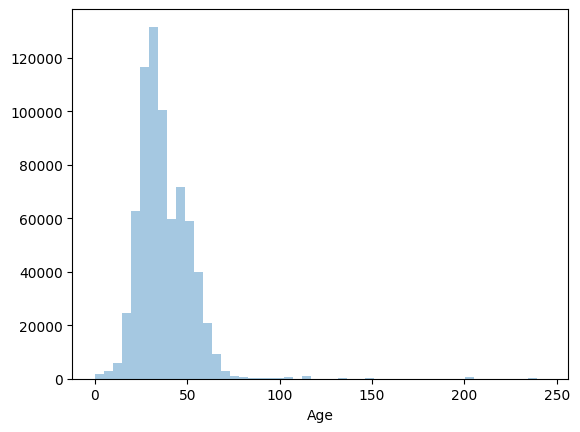

In [ ]:
sns.distplot(data['Age'].dropna(), kde=False)

In [ ]:


print('Number of outliers: ', sum(data['Age'] > 100))



Number of outliers:  2747


In [ ]:
data['Book-Rating'] = data['Book-Rating'].replace(0, None)

In [ ]:
print('Average book rating: ', round(data['Book-Rating'].mean(), 2))

Average book rating:  7.63


<Axes: xlabel='Year-Of-Publication'>

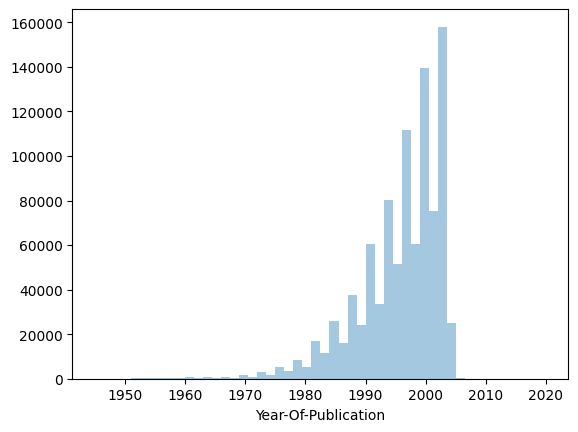

In [ ]:
import pandas as pd
import seaborn as sns

# Publication by Year
year = pd.to_numeric(data['Year-Of-Publication'], errors='coerce').fillna(2099)
sns.distplot(year, kde=False, hist_kws={"range": [1945,2020]})


In [ ]:
country = data['Location'].apply(lambda row: str(row).split(',')[-1])
data.groupby(country)['Book-Rating'].count().sort_values(ascending=False).head(10)

Location
 usa               248446
 canada             33424
 united kingdom     13676
 germany            11401
                     9933
 spain               6690
 n/a                 6539
 australia           6436
 france              4556
 portugal            3243
Name: Book-Rating, dtype: int64


# Feature Engineering

In [ ]:
# Cast to numeric
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'], 'coerce').fillna(2099, downcast = 'infer')

In [ ]:
data['Book-Rating'] = data['Book-Rating'].replace(0, None)

# Handle outliers

In [ ]:
data['Age'] = np.where(data['Age']>90, None, data['Age'])


# Impute nulls


In [ ]:
# Categorical feautes
data[['Book-Author', 'Publisher']] = data[['Book-Author', 'Publisher']].fillna('Unknown')

In [ ]:
# Check cat features
data[['Book-Author', 'Publisher']].isnull().sum()

Book-Author    0
Publisher      0
dtype: int64

In [ ]:
# Age
median = data["Age"].median()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size = is_null)
age_slice = data["Age"].copy()
age_slice[pd.isnull(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)


In [ ]:
# Check Age
data['Age'].isnull().sum()

0


# Extract features

In [ ]:
data['Country'] = data['Location'].apply(lambda row: str(row).split(',')[-1])

In [ ]:
# Drop irelevant
data = data.drop('Location', axis=1)

In [ ]:
data['Country'].head()

0     usa
1     usa
2     usa
3     usa
4     usa
Name: Country, dtype: object

# Prepare Dataset for Deep Learning Recommendation

In [ ]:
df = data
# Relevant score
df = df[df['Book-Rating'] >= 6]
# Check
df.groupby('ISBN')['User-ID'].count().describe()
df.groupby('User-ID')['ISBN'].count().describe()
df = df.groupby('User-ID').filter(lambda x: len(x) >= 5)
df.shape

(231963, 12)

In [ ]:
df

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Country
4,10314,034545104X,9.0,23,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa
14,77480,034545104X,8.0,51,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa
18,98391,034545104X,9.0,52,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa
19,112199,034545104X,6.0,72,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa
22,128045,034545104X,7.0,41,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
977580,276681,0140290788,9.0,43,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books,http://images.amazon.com/images/P/0140290788.0...,http://images.amazon.com/images/P/0140290788.0...,http://images.amazon.com/images/P/0140290788.0...,usa
977581,276681,0609806491,7.0,43,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA),http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,usa
977583,276681,1931333246,10.0,43,Chorus,Kurt Messick,2003,Dry Bones Press,http://images.amazon.com/images/P/1931333246.0...,http://images.amazon.com/images/P/1931333246.0...,http://images.amazon.com/images/P/1931333246.0...,usa
977587,276688,0312264186,8.0,36,You Can't Catch Death: A Daughter's Memoir,Ianthe Brautigan,2001,St. Martin's Press,http://images.amazon.com/images/P/0312264186.0...,http://images.amazon.com/images/P/0312264186.0...,http://images.amazon.com/images/P/0312264186.0...,usa


In [ ]:
!pip install mxnet

In [ ]:
# importing all the required libraries.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from keras.layers import Input, Embedding, Dense, Flatten, Dropout, SpatialDropout1D, Activation, concatenate
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
import os
#from mxnet import gluon, np
from time import time
from datetime import datetime, timedelta
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import keras
import tensorflow as tf

# New Section

In [ ]:
print(df.columns)
# Check for NaN values
print(df.isnull().sum())

# Handle NaN values
df = df.dropna()

Index(['User-ID', 'ISBN', 'Book-Rating', 'Age', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Country'],
      dtype='object')
User-ID                0
ISBN                   0
Book-Rating            0
Age                    0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Country                0
dtype: int64


let me explain the code step by step:

1. **Import Libraries**:
   - We import necessary libraries like Pandas for data manipulation, scikit-learn for data preprocessing, and TensorFlow Keras for building and training the deep learning model.

2. **Load the Dataset**:
   - Assuming `df` is a DataFrame containing the dataset. This could be your book review dataset.

3. **Preprocess the Data**:
   - **Label encode categorical features**: For each categorical feature specified in `cat_features`, we use `LabelEncoder` to encode them into integer labels. This is necessary because deep learning models typically work with numerical inputs.
   - **Normalize numerical features**: For numerical features specified in `num_features`, we use `MinMaxScaler` to scale them to a range between 0 and 1. This ensures that all features have a similar scale, which can improve the training process for the deep learning model.

4. **Split the Data**:
   - We split the preprocessed DataFrame into training and testing sets using `train_test_split` from scikit-learn. The training set will be used to train the model, and the testing set will be used to evaluate its performance.

5. **Define the Model Architecture**:
   - We define a Wide & Deep model architecture, inspired by the Wide & Deep Learning for Recommender Systems paper. This model consists of two main parts:
     - **Wide part**: This part learns feature interactions using linear models.
     - **Deep part**: This part learns feature representations using deep neural networks.
   - For the wide part, we create embedding layers for each categorical feature and concatenate them.
   - For the deep part, we use dense layers to process numerical features.
   - Finally, we concatenate the outputs of the wide and deep parts and add a dense output layer with a sigmoid activation function.

6. **Create and Compile the Model**:
   - We create the wide and deep model using the defined architecture and compile it using the Adam optimizer and binary cross-entropy loss function.

7. **Train the Model**:
   - We train the model using the training data. We pass both the wide and deep input features to the model during training, along with the target variable (`Book-Rating`).
   - The model is trained for 10 epochs with a batch size of 64 and a validation split of 0.2.

8. **Evaluate the Model**:
   - Once the model is trained, we evaluate its performance using the testing data.
   - We again pass both the wide and deep input features to the model during evaluation, along with the target variable.
   - The model calculates the test loss and accuracy, which are then printed out.

This code essentially builds, trains, and evaluates a Wide & Deep Recommender System for the given book review dataset. It combines the strengths of both linear models and deep neural networks to provide accurate predictions.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam

# Load the dataset
# Assuming df is the DataFrame containing the dataset

# Preprocess the data
# Label encode categorical features
cat_features = ['User-ID', 'Book-Title', 'Book-Author', 'Publisher', 'Country']
encoder = LabelEncoder()
for feature in cat_features:
    df[feature] = encoder.fit_transform(df[feature])

# Normalize numerical features
num_features = ['Age']
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the model architecture
def create_wide_and_deep_model():
    # Wide part
    wide_inputs = []
    wide_branches = []
    for feature in cat_features:
        input_layer = Input(shape=(1,), name=f'{feature}_input')
        embedding_layer = Embedding(input_dim=df[feature].max() + 1, output_dim=10)(input_layer)
        embedding_layer = Flatten()(embedding_layer)
        wide_inputs.append(input_layer)
        wide_branches.append(embedding_layer)

    wide_output = Concatenate()(wide_branches)

    # Deep part
    deep_inputs = Input(shape=(len(num_features),), name='numeric_input')
    deep_layer = Dense(64, activation='relu')(deep_inputs)
    deep_output = Dense(32, activation='relu')(deep_layer)

    # Concatenate wide and deep parts
    concat = Concatenate()([wide_output, deep_output])

    # Output layer
    #output = Dense(1, activation='sigmoid', name='output')(concat)
    #Output layer for regression (no activation function)
    output = Dense(1, name='output')(concat)

    # Create model
    model = Model(inputs=[wide_inputs, deep_inputs], outputs=output)

    return model

# Create and compile the model
model = create_wide_and_deep_model()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
X_train_wide = [train_df[feature] for feature in cat_features]
X_train_deep = train_df[num_features].values.astype('float32')  # Convert to float32
y_train = train_df['Book-Rating'].values.astype('float32')  # Convert to float32
model.fit(x=[X_train_wide, X_train_deep], y=y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
X_test_wide = [test_df[feature] for feature in cat_features]
X_test_deep = test_df[num_features].values.astype('float32')  # Convert to float32
y_test = test_df['Book-Rating'].values.astype('float32')  # Convert to float32
test_loss, test_accuracy = model.evaluate(x=[X_test_wide, X_test_deep], y=y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Epoch 1/10
2320/2320 [==============================] - 50s 21ms/step - loss: -106.4992 - accuracy: 0.0000e+00 - val_loss: -110.9835 - val_accuracy: 0.0000e+00
Epoch 2/10
2320/2320 [==============================] - 46s 20ms/step - loss: -111.0997 - accuracy: 0.0000e+00 - val_loss: -110.9836 - val_accuracy: 0.0000e+00
Epoch 3/10
2320/2320 [==============================] - 46s 20ms/step - loss: -111.0999 - accuracy: 0.0000e+00 - val_loss: -110.9836 - val_accuracy: 0.0000e+00
Epoch 4/10
2320/2320 [==============================] - 46s 20ms/step - loss: -111.0998 - accuracy: 0.0000e+00 - val_loss: -110.9836 - val_accuracy: 0.0000e+00
Epoch 5/10
2320/2320 [==============================] - 45s 19ms/step - loss: -111.0998 - accuracy: 0.0000e+00 - val_loss: -110.9836 - val_accuracy: 0.0000e+00
Epoch 6/10
2320/2320 [==============================] - 45s 19ms/step - loss: -111.0999 - accuracy: 0.0000e+00 - val_loss: -110.9836 - val_accuracy: 0.0000e+00
Epoch 7/10
2320/2320 [==================